In [2]:
import pandas as pd
import numpy as np
crosswalks = pd.read_csv("CityofPittsburghIntersectionMarkers.csv")
%matplotlib inline
import matplotlib.pyplot as plt
crosswalks.head(5)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267


This first block of code imports everything we'll need and prints the first few rows of data.

In [4]:
numbor = 0
myDict = {}
for index, row in crosswalks.iterrows():
    neighborhood = row['neighborhood']
    for thing in myDict:   
        if(neighborhood == thing):
            myDict[thing] = myDict[thing] + 1
            numbor = numbor + 1
    if(numbor == 0):
        myDict[neighborhood] = 1
    numbor = 0
numList = []
for thing in myDict:
    numList.append(myDict[thing])
sortedNumList = sorted(numList, reverse = True)
max = sortedNumList[0]
num2 = sortedNumList[1]
num3 = sortedNumList[2]
for thingy in myDict:
    if(myDict[thingy] == max):
        print(thingy + ", " + str(max))
for thingy in myDict:
    if(myDict[thingy] == num2):
        print(thingy + ", " + str(num2))
for thingy in myDict:
    if(myDict[thingy] == num3):
        print(thingy + ", " + str(num3))

Central Business District, 402
South Side Flats, 262
Squirrel Hill South, 239


This block of code does a bit more than the first. It iterates through the dataframe and adds each neighborhood to a dictionary as a key. The number of appearances for each neighborhood is then added as the value next to their neighborhood, which indicates the number of crosswalks in each neighborhood. Then, the values are sorted in their own list to determine which neighborhood has the most crosswalks. The top three are printed above.

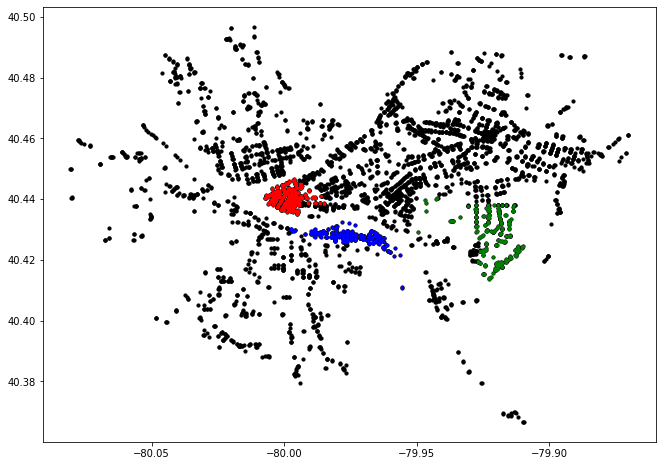

In [5]:
plt.rcParams['figure.figsize'] = [11,8]
plt.scatter(crosswalks['longitude'], crosswalks['latitude'], color='black', s=10)
CBD = crosswalks.loc[crosswalks['neighborhood']=='Central Business District',:]
SSF = crosswalks.loc[crosswalks['neighborhood']=='South Side Flats',:]
SHS = crosswalks.loc[crosswalks['neighborhood']=='Squirrel Hill South',:]
plt.scatter(CBD['longitude'], CBD['latitude'], color='red', s=5)
plt.scatter(SSF['longitude'], SSF['latitude'], color='blue', s=5)
plt.scatter(SHS['longitude'], SHS['latitude'], color='green', s=5)

This block of code works on a scatterplot, showing every single crosswalk in the dataset. They appear in black. If the crosswalk exists in the top three neighborhoods, they are assigned a color based on the neighborhood they exist in. The Central Business District appears in red, the South Side Flats appear in blue, and Squirrel Hill South appears in green. 

Overall, the best neighborhood in terms of the number of crosswalks that exist is the Central Business District, and this is the case by a pretty significant margin.